In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("/Users/suryamanitejendla/Downloads/DAEN-690-main/identical123.csv")

In [3]:
df.head(5)

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC.1,SUPERVIS.1,TOA.1,WORKSCH.1,WORKSTAT.1,DATECODE1,EMPLOYMENT1,SALARY.1,LOS.1,Salary_hike
0,AF1Q,40,J,4,12,F,1670,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,98155,17.6,0
1,AF1Q,40,I,13,13,I,1361,2,99,GS-13,...,1361,8,10,F,1,202109,1,119787,32.3,0
2,AF1Q,40,I,10,13,G,2150,2,99,GS-13,...,XXXX,2,10,F,1,202109,1,119787,20.7,0
3,AF1Q,40,J,14,13,H,1372,1,99,GS-13,...,1372,8,10,F,1,202109,1,119787,26.3,0
4,AF1Q,40,G,10,12,E,343,2,99,GS-12,...,XXXX,8,10,F,1,202109,1,82655,14.8,0


In [11]:
df.corr()

,EDLVL,GSEGRD,OCC,PATCO,SUPERVIS,TOA,WORKSTAT,SALARY,LOS,EDLVL.1,GSEGRD.1,OCC.1,PATCO.1,SUPERVIS.1,TOA.1,WORKSTAT.1,SALARY.1,LOS.1,Salary_hike
EDLVL,1.000000,0.216129,-0.104548,-0.292583,-0.130038,0.231753,-0.012737,0.155506,-0.172708,1.000000,0.225207,-0.110016,-0.292583,-0.130038,0.231753,-0.012737,0.159318,-0.172708,0.006766
GSEGRD,0.216129,1.000000,0.136599,-0.508998,-0.457438,-0.022873,-0.226697,0.871876,0.212991,0.216129,0.983852,0.134586,-0.508998,-0.457438,-0.022873,-0.226697,0.867076,0.212991,-0.068160
OCC,-0.104548,0.136599,1.000000,-0.132350,0.043985,-0.047987,-0.069900,0.083185,0.054067,-0.104548,0.128905,0.974478,-0.132350,0.043985,-0.047987,-0.069900,0.078709,0.054067,-0.036591
PATCO,-0.292583,-0.508998,-0.132350,1.000000,0.123015,-0.341491,0.159431,-0.400246,-0.011569,-0.292583,-0.524581,-0.129800,1.000000,0.123015,-0.341491,0.159431,-0.406511,-0.011569,0.001590
SUPERVIS,-0.130038,-0.457438,0.043985,0.123015,1.000000,-0.039009,0.052634,-0.545530,-0.130991,-0.130038,-0.466371,0.040398,0.123015,1.000000,-0.039009,0.052634,-0.551646,-0.130991,-0.002937
TOA,0.231753,-0.022873,-0.047987,-0.341491,-0.039009,1.000000,0.474239,0.020549,-0.203159,0.231753,0.009174,-0.047112,-0.341491,-0.039009,1.000000,0.474239,0.026769,-0.203159,0.018332
WORKSTAT,-0.012737,-0.226697,-0.069900,0.159431,0.052634,0.474239,1.000000,-0.195464,-0.175074,-0.012737,-0.176418,-0.068761,0.159431,0.052634,0.474239,1.000000,-0.182058,-0.175074,0.106272
SALARY,0.155506,0.871876,0.083185,-0.400246,-0.545530,0.020549,-0.195464,1.000000,0.417411,0.155506,0.859187,0.084155,-0.400246,-0.545530,0.020549,-0.195464,0.993158,0.417411,-0.130796
LOS,-0.172708,0.212991,0.054067,-0.011569,-0.130991,-0.203159,-0.175074,0.417411,1.000000,-0.172708,0.194413,0.051306,-0.011569,-0.130991,-0.203159,-0.175074,0.410170,1.000000,-0.119571
EDLVL.1,1.000000,0.216129,-0.104548,-0.292583,-0.130038,0.231753,-0.012737,0.155506,-0.172708,1.000000,0.225207,-0.110016,-0.292583,-0.130038,0.231753,-0.012737,0.159318,-0.172708,0.006766


In [4]:
del df['DATECODE']
del df['DATECODE1']
del df['EMPLOYMENT']
del df['EMPLOYMENT1']
del df['PP']
del df['PP1']

In [5]:
df

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,...,PPGRD.1,SALLVL.1,STEMOCC.1,SUPERVIS.1,TOA.1,WORKSCH.1,WORKSTAT.1,SALARY.1,LOS.1,Salary_hike
0,AF1Q,40,J,4,12,F,1670,2,GS-12,I,...,GS-12,I,XXXX,8,10,F,1,98155,17.6,0
1,AF1Q,40,I,13,13,I,1361,2,GS-13,K,...,GS-13,K,1361,8,10,F,1,119787,32.3,0
2,AF1Q,40,I,10,13,G,2150,2,GS-13,K,...,GS-13,K,XXXX,2,10,F,1,119787,20.7,0
3,AF1Q,40,J,14,13,H,1372,1,GS-13,K,...,GS-13,K,1372,8,10,F,1,119787,26.3,0
4,AF1Q,40,G,10,12,E,343,2,GS-12,H,...,GS-12,H,XXXX,8,10,F,1,82655,14.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,VAKB,11,I,15,15,I,301,2,GS-15,Q,...,GS-15,Q,XXXX,8,10,F,1,172500,30.3,0
1276,VAKB,11,F,13,15,G,343,2,GS-15,N,...,GS-15,N,XXXX,8,15,F,1,148932,21.2,0
1277,VAKB,11,H,13,14,D,301,2,GS-14,L,...,GS-14,M,XXXX,8,10,F,1,130698,9.3,1
1278,VAKB,11,E,17,12,E,301,2,GS-12,H,...,GS-13,J,XXXX,8,10,F,1,103690,11.8,1


In [6]:
df.shape

(1280, 35)

In [7]:
df.describe()

,EDLVL,GSEGRD,OCC,PATCO,SUPERVIS,TOA,WORKSTAT,SALARY,LOS,EDLVL.1,GSEGRD.1,OCC.1,PATCO.1,SUPERVIS.1,TOA.1,WORKSTAT.1,SALARY.1,LOS.1,Salary_hike
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,11.994531,12.519531,779.680469,1.944531,7.035938,12.720313,1.022656,110173.682813,15.392656,11.994531,12.589063,776.703125,1.944531,7.035938,12.720313,1.022656,111371.032031,15.692656,0.202344
std,5.295414,1.785510,417.528118,0.448315,2.191095,6.413670,0.148863,28749.405519,11.354620,5.295414,1.699433,417.849165,0.448315,2.191095,6.413670,0.148863,28328.210331,11.354620,0.401904
min,1.000000,4.000000,18.000000,1.000000,2.000000,10.000000,1.000000,31520.000000,0.000000,1.000000,4.000000,18.000000,1.000000,2.000000,10.000000,1.000000,31520.000000,0.300000,0.000000
25%,7.000000,12.000000,343.000000,2.000000,8.000000,10.000000,1.000000,92523.000000,5.800000,7.000000,12.000000,343.000000,2.000000,8.000000,10.000000,1.000000,93688.500000,6.100000,0.000000
50%,13.000000,13.000000,905.000000,2.000000,8.000000,10.000000,1.000000,110985.000000,13.650000,13.000000,13.000000,905.000000,2.000000,8.000000,10.000000,1.000000,112172.000000,13.950000,0.000000
75%,17.000000,13.000000,1101.000000,2.000000,8.000000,10.000000,1.000000,127353.250000,22.900000,17.000000,13.000000,1101.000000,2.000000,8.000000,10.000000,1.000000,127844.500000,23.200000,0.000000
max,21.000000,15.000000,2210.000000,5.000000,8.000000,44.000000,2.000000,172500.000000,60.000000,21.000000,15.000000,2210.000000,5.000000,8.000000,44.000000,2.000000,172500.000000,60.300000,1.000000


In [8]:
Agency_Onehot = pd.get_dummies(df.AGYSUB, prefix='Agency')

In [9]:
EDU_Onehot = pd.get_dummies(df.EDLVL, prefix='Education level')

In [12]:
Agency1_Onehot = pd.get_dummies(df.AGYSUB_1, prefix='Agency1')

AttributeError: 'DataFrame' object has no attribute 'AGYSUB_1'

In [ ]:
EDU1_Onehot = pd.get_dummies(df.EDLVL.1, prefix = 'Education level1')

In [6]:
df.dtypes

AGYSUB          object
LOC             object
AGELVL          object
EDLVL            int64
GSEGRD           int64
LOSLVL          object
OCC              int64
PATCO            int64
PPGRD           object
SALLVL          object
STEMOCC         object
SUPERVIS         int64
TOA              int64
WORKSCH         object
WORKSTAT         int64
SALARY           int64
LOS            float64
AGYSUB.1        object
LOC.1           object
AGELVL.1        object
EDLVL.1          int64
GSEGRD.1         int64
LOSLVL.1        object
OCC.1            int64
PATCO.1          int64
PPGRD.1         object
SALLVL.1        object
STEMOCC.1       object
SUPERVIS.1       int64
TOA.1            int64
WORKSCH.1       object
WORKSTAT.1       int64
SALARY.1         int64
LOS.1          float64
Salary_hike      int64
dtype: object

In [ ]:
#del df['AGYSUB']

In [ ]:
#del df['SALLVL']

In [9]:
X = pd.concat([Agency_Onehot, EDU_Onehot], axis=1)

In [10]:
y = pd.to_numeric(df['Salary_hike'])

In [ ]:
#y = np.ravel(y)

In [11]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [25]:
len(X_train)

896

In [26]:
len(X_test)

384

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()

In [29]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8151041666666666


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[313   0]
 [ 71   0]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       313
           1       0.00      0.00      0.00        71

    accuracy                           0.82       384
   macro avg       0.41      0.50      0.45       384
weighted avg       0.66      0.82      0.73       384



/Users/suryamanitejendla/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suryamanitejendla/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suryamanitejendla/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

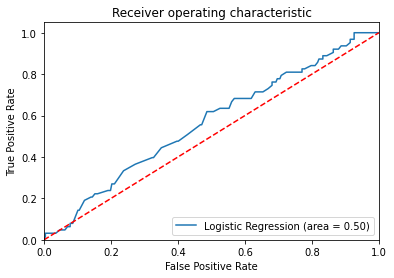

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [36]:
X = pd.concat([Agency_Onehot, EDU_Onehot], axis=1)

In [37]:
y = pd.to_numeric(df['Salary_hike'])

In [ ]:
#y = np.ravel(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [51]:
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [52]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [53]:
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [54]:
from sklearn import metrics

In [55]:
rf_probs = model.predict_proba(X_test)[:, 1]

In [56]:
rf_probs

array([1.24679246e-01, 1.75041101e-01, 2.19486372e-01, 1.60869479e-01,
       1.24679246e-01, 1.81397383e-01, 2.37873377e-01, 1.60731241e-01,
       9.14380952e-02, 9.51749564e-02, 0.00000000e+00, 3.72865678e-01,
       3.41191649e-02, 2.81143212e-01, 3.09192049e-01, 4.77596681e-01,
       2.37873377e-01, 2.05685265e-01, 4.27875192e-01, 2.19486372e-01,
       2.19486372e-01, 9.82334415e-02, 2.34217069e-01, 6.18443760e-02,
       1.66215479e-01, 1.25430584e-01, 3.11991175e-01, 3.67107197e-01,
       9.74194055e-02, 2.22965329e-01, 1.03741928e-01, 2.42297186e-01,
       3.09192049e-01, 3.25563460e-01, 2.27786407e-01, 2.27786407e-01,
       1.86921925e-01, 2.94122157e-01, 1.92764252e-01, 9.74194055e-02,
       2.35794646e-01, 3.72865678e-01, 1.03741928e-01, 2.34217069e-01,
       4.68541433e-01, 4.09274586e-01, 0.00000000e+00, 1.35826400e-01,
       6.65276476e-01, 7.77777778e-04, 2.04303968e-01, 7.20069013e-02,
       1.24679246e-01, 0.00000000e+00, 3.09192049e-01, 1.66215479e-01,
      

In [57]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [58]:
roc_value

0.5093307892777365

In [59]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.83


In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[316   0]
 [ 66   2]]


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       316
           1       0.30      0.04      0.08        68

    accuracy                           0.81       384
   macro avg       0.56      0.51      0.49       384
weighted avg       0.73      0.81      0.75       384



In [61]:
print(accuracy_score(y_test, y_pred))

0.828125
